## Правила

**Домашнее задание**
- Будет выдаваться после каждого семинара, иногда это будут конкурсы
- Задание необходимо сдать в течении недели после семинара до четверга 23:59
- Задание оценивается  1, если вы его сделали достаточно хорошо
- Задание оценивается  0, если вы не выполнили задание или сделали много ГРУБЫХ ошибок 
- Задание оценивается -1, если вы его списали (и тому кто и тому у кого)
- Задания, присланные после дедлайна, не проверяются
- **PS**: Каждый 0 или -1 это доп. вопрос на зачете, который идет в итоговую оценку за зачет. 

**Конкурсы**

- Будет проведено 4 конкурса 
- Задание необходимо сдать в течение недели после семинаров всех групп
- Вы получаете 1 балл, если побили бейзлайн и коротко текстом описали решение, 0 - если нет
- Бонусы получают первые три человека в каждой в группе

**Экзамен**

- Будет экзамен (п.н. для 399), автоматов не будет
- Будет список вопросов 
- М.б. будет теор. минимум

**Оценка**

Финальная оценка будет вычисляться, как
    $$mark = [exam\_creidts > c_0] \cdot (c_1 \cdot hw\_credits + c_2 \cdot contest\_credits + c_3 \cdot exam\_creidts)$$
коэффициенты будут объявлены позже

--------------------------------

# Семинар 2. Часть 1.


### Доска:

- бустинг
- градиентный бустинг
- адаптивный бустинг (AdaBoost)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

<h1 align="center">Переобучение и регуляризация</h1> 


- Что будет, если первый классификатор хорошо предскажет все ответы?
- Переобучается ли бустинг в случае переобучения одной компоненты?

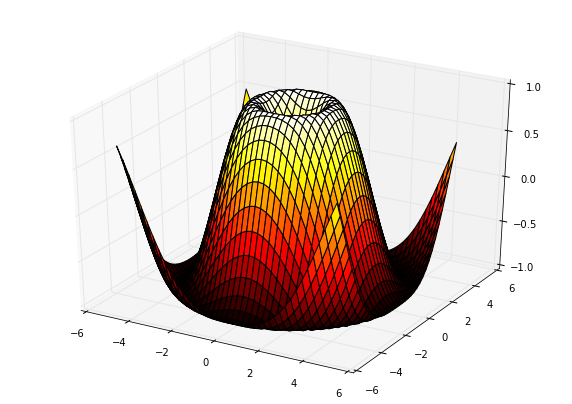

In [10]:
def draw_3d(X, Y, Z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot)
    fig.show()

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zt = np.sin(np.sqrt(X**2 + Y**2))

draw_3d(X, Y, Zt)

### Наложим шум

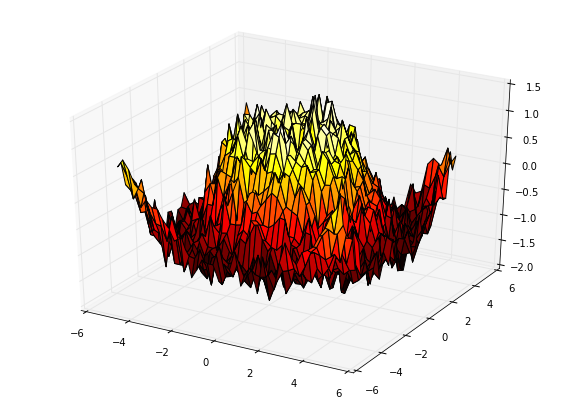

In [11]:
Z = Zt
Z += np.random.normal(size=X.shape)*0.2
draw_3d(X, Y, Z)

### Тренируем AdaBoostRegressor

Каков будет результат?

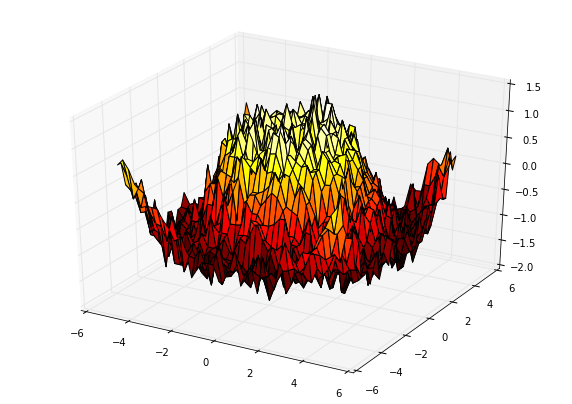

In [12]:
f1 = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(), 
    loss='exponential').fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))
draw_3d(X, Y, Zf1.reshape(40, 40))

### Тренируем SVM Regressor

Какой результат будет? Какое ядро стоит взять?

In [13]:
from IPython.display import Image
Image(url='http://scikit-learn.org/stable/_images/plot_iris_0012.png')

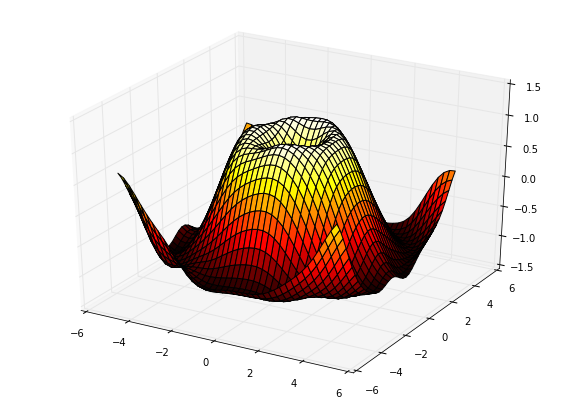

In [14]:
f1 = SVR(kernel='rbf').fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))
draw_3d(X, Y, Zf1.reshape(40, 40))

### Делаем из бустинка конфетку

- Переобучается ли бустинг в случае переобучения одной компоненты?
- Как регуляризовывать бустинг?
    - Регуляризуем методы
    - $$\sum_{t=0}^{T-1} a_t f_t (x) + v \cdot a_t f_t(x), 0 < v < 1$$
- Какие функции потерь использовать?

In [15]:
?AdaBoostRegressor

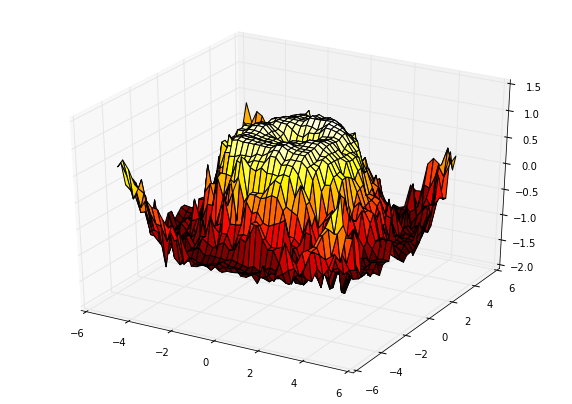

In [30]:
# ====================================
#       Ячейка интерактива
# ====================================

f1 = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=12), 
    loss='exponential', 
    learning_rate=0.1, 
    n_estimators=50
).fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))
draw_3d(X, Y, Zf1.reshape(40, 40))

<h1 align="center">Real Data</h1> 

In [7]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values

### Gradient Boosting vs Stochastic Gradient Boosting


In [13]:
%%time

for clf in [LogisticRegression(), RandomForestClassifier(),
            GradientBoostingClassifier(), GradientBoostingClassifier(subsample=0.8)]:
    scores = cross_val_score(clf, X, y, cv=4, n_jobs=4)
    print('{}\n{}\nmean: {}\tstd: {}\n'.format(clf, scores, round(scores.mean(), 3), round(scores.std(), 4)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[ 0.79707653  0.79459459  0.7992629   0.80036855]
mean: 0.798	std: 0.0022

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[ 0.84657904  0.84275184  0.8497543   0.84840295]
mean: 0.847	std: 0.0026

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fractio

### Gradient Boosting and a lot of features

In [2]:
from utils_2 import load_CIFAR10  # python3 !!!
from sklearn.metrics import accuracy_score

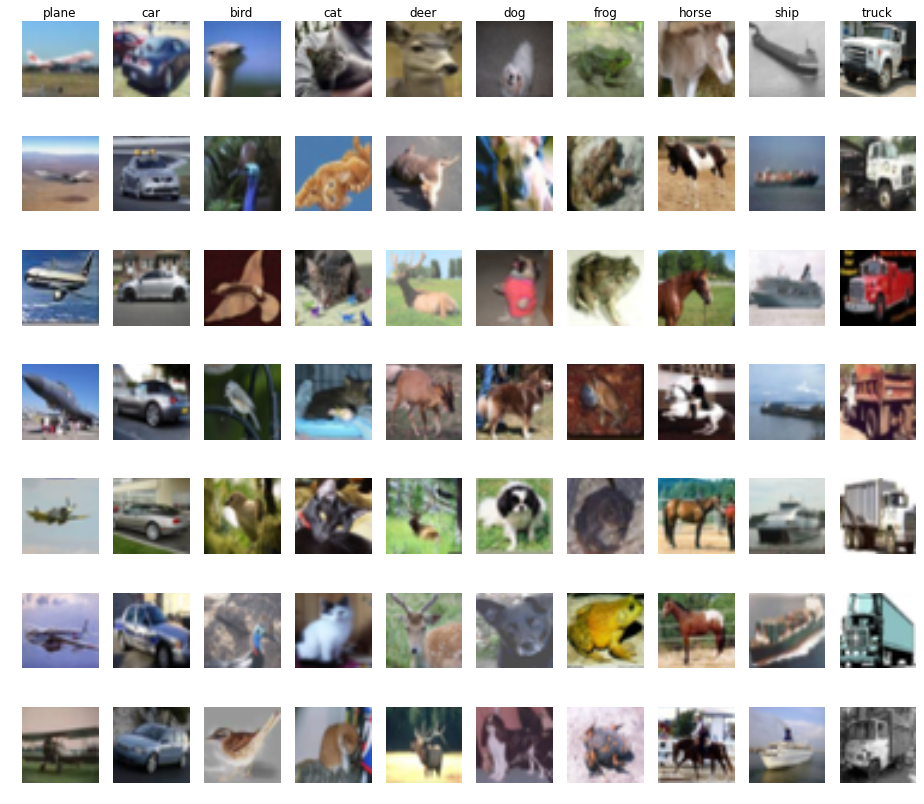

In [3]:
X_train, y_train, X_test, y_test = load_CIFAR10('./data/cifar10/')

plt.figure(figsize=(16, 14))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


In [5]:
# ===========================================
#  Даже не пытйтесь это учить. Почему??!!
# ===========================================

#clf1 = GradientBoostingClassifier(subsample=0.3, learning_rate=0.05, n_estimators=10).fit(X_train, y_train)
#print accuracy_score(clf1.predict(X_train), y_train), accuracy_score(clf1.predict(X_test), y_test)

Сначала сжимаем данные с помощью PCA

In [5]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :])
X_tr, X_te = transform.transform(X_train), transform.transform(X_test)

clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05, n_estimators=100).fit(X_tr[:3000], y_train[:3000])
print(accuracy_score(clf1.predict(X_tr), y_train), accuracy_score(clf1.predict(X_te), y_test))

0.35914 0.3287


### Length of dataset

Посмотрим, как зависит качество от длины обучающей выборки

In [6]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :])
X_tr, X_te = transform.transform(X_train), transform.transform(X_test)

In [ ]:
for i in [300, 1000]:#, 3000, 5000, 10000, 20000, 40000]:
    %time clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
    print '#num_items', i, 'test', accuracy_score(clf1.predict(X_te), y_test), '\n'

<h1 align="center">eXtreme Gradient Boosting vs sklearn</h1> 

In [7]:
import sys
sys.path.append('/Путь к папке/XGboost/xgboost-master/python-package/')
import xgboost as xgb

In [8]:
%%time
i = 5000
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.1, n_estimators=200).fit(X_tr[:i], y_train[:i])
print('test', accuracy_score(clf1.predict(X_te), y_test))

test 0.3776
CPU times: user 2min 44s, sys: 24.9 ms, total: 2min 44s
Wall time: 2min 44s


In [9]:
%%time
i = 5000
clf1 = xgb.XGBClassifier(subsample=0.8, learning_rate=0.1, n_estimators=200).fit(X_tr[:i], y_train[:i])
print('test', accuracy_score(clf1.predict(X_te), y_test))

test 0.39
CPU times: user 3min 12s, sys: 187 ms, total: 3min 12s
Wall time: 49.8 s


Качество лучше, работает быстрее. Иногда проигрывает RGBM, надо пробовать. 

Итак, градиентный бустинг в XGBoost имеет ряд важных особенностей.
1. Каждая компонента приближает направление, посчитанное с учетом вторых производных функции потерь.
2. Отклонение направления, построенного компонентой, измеряется с помощью модифицированного функционала — из него удалено деление на вторую производную, за счет чего избегаются численные проблемы.
3. Функционал регуляризуется -- добавляются штрафы за количество листьев и за норму коэффициентов.
4. При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига.
5. Критерий останова при обучении дерева также зависит от оптимального сдвига.

In [12]:
%%time

from sklearn.grid_search import GridSearchCV

grid = {'n_estimators': [50, 100], 'max_depth': [4, 6]}
gs = GridSearchCV(xgb.XGBClassifier(), grid, scoring='accuracy', cv=2, n_jobs=4)
gs.fit(X_tr, y_train)

for a in gs.grid_scores_:
    print(a.parameters, a.mean_validation_score)

KeyboardInterrupt: 

<h1 align="center">Recap</h1> 

- Один из лучших методов построения композиций
- Нужно много деревьев и желательно не тысячи признаков
- Много хороших реализаций
- Плохо подходит для картинок и прочих очень понятных данных

**Что почитать**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy